<a href="https://colab.research.google.com/github/Brianmaina909/Kenyan-Insurance-Provider-Recommender-System/blob/main/Clean_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Understanding**
According to Cytonn's report on Kenya's listed insurance sector for H1 2023, insurance penetration in Kenya remains historically low. As of FY 2022, penetration stood at just 2.3%, according to the Kenya National Bureau of Statistics (KNBS) 2023 Economic Survey. This is notably below the global average of 7.0%, as reported by the Swiss Re Institute. The low penetration rate is largely attributed to the perception of insurance as a luxury rather than a necessity, and it is often purchased only when required or mandated by regulation. Additionally, a pervasive mistrust of insurance providers has significantly contributed to the low uptake.

Despite the critical importance of non-liability insurance—such as health, property, and personal accident coverage—for financial protection against unforeseen events, many individuals find it challenging to identify a trustworthy insurance provider due to opaque information on claim settlement records. This project seeks to address this pressing issue by simplifying the process of selecting a suitable insurance provider based on their performance in settling non-liability claims. By enhancing transparency and fostering trust in insurance providers, the project aims to boost insurance uptake and overall customer satisfaction.


# **Problem Statement**
Kenya faces a significant challenge with low insurance penetration, standing at just 2.3% as of FY 2022, well below the global average of 7.0%. This disparity is largely due to the perception of insurance as a luxury rather than a necessity, coupled with widespread mistrust towards insurance providers. Many Kenyans only purchase insurance when mandated or compelled by regulation, undermining the financial protection benefits offered by non-liability insurance such as health, property, and personal accident coverage.


## **Objectives**
Our project aims to address these challenges through the development of a recommender system tailored for the Kenyan market. The system will leverage historical data to evaluate insurers based on their performance in settling non-liability claims. By providing transparent insights into insurers' reliability and enhancing trust between consumers and providers, we seek to achieve the following objectives:

1. **Enhanced Transparency:** By providing clear and detailed information on insurers' performance, we aim to improve market transparency and help customers make well-informed decisions.

2. **Increased Customer Trust:** Our goal is to build greater trust between customers and insurance providers by showcasing insurers' reliability in settling non-liability claims.

3. **Boosted Insurance Uptake:** We seek to encourage more people to purchase insurance by simplifying the process of finding trustworthy insurers, thereby increasing overall market penetration.

4. **Improved Customer Satisfaction:** By guiding customers toward insurers with strong claim settlement records, we aim to enhance their overall satisfaction with the insurance experience

# **Metrics of Success**
To ensure the success of our recommender system modeling, we shall:

1. **Achieve High Accuracy:** We will aim for an F1 Score of at least 0.75, ensuring our model effectively identifies reliable insurers while balancing Precision and Recall.

2. **Minimize Prediction Error:** We will target a Mean Absolute Error (MAE) of less than 0.2, indicating that our model’s predictions closely match the actual performance data of insurance providers.

3. **Optimize Recommendations:** We will strive for a Precision at K of at least 0.7 for the top 5 recommendations, ensuring that 70% of these top recommendations are both relevant and reliable.

## **Data Understanding**

Our approach will involve analyzing aggregated data from multiple sources, including historical claim settlement records, insurer performance metrics, and customer feedback. By normalizing and processing this data, we aim to develop a robust recommendation model that aligns with consumer needs and market dynamics.

The dataset obtained from Insurance Regulatory Authority(IRA) website (https://www.ira.go.ke/index.php/publications/statistical-reports/claims-settlement-*statistics*) contains the following columns:

Date: Date of the record.

Insurer: Name of the insurance company.

Claims_outstanding_at_the_beginning: Claims outstanding at the beginning of the period.

Claims_intimated_and_revived: Claims intimated- this comprises of the number of claims that have been reported to the insurers during the quarter.

Revived claims – these are claims previously closed but have been
revived by the policyholders/claimant during the quarter

Claims_revised: claims whose reserves amount have been
changed during the quarter.

Total_Claims_Payable: Total claims payable.

Claims_paid: these are the claims paid by the insurers during the quarter. The claims paid may include those outstanding at the beginning of the period and those intimated and revived during the quarter.

Claims_declined: Claims declined during the period.

Claims_closed_as_no_claims: notified claims for which the insurer
makes provisions for liability, but the liability does not crystalize during the quarter.

Total_Claims_Action_during_the_Quarter: summation of the number of
claims paid, claims declined, claims closed as no claims, and claims
outstanding at the end of the quarter.


Claims_outstanding_at_the_end: Claims outstanding at the end of the period.

Claims_declined_ratio_(%):  proportion of the number of claims declined in relation to the total
number of claims actionable during the quarter

Claims_closed_as_no_claims_ratio (%): proportion of claims closed as no claims in relation to the total number
of claims actionable during the quarter.

Claim_payment_ratio_(%): proportion of the number of claims paid in relation to the total number
of claims actionable during the quarter.

Claim_payment_ratio_(%)_prev: Previous claim payment ratio.

**Importing Libraries**

In [ ]:
# Import Libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

### **Data Loading**

Having combined our datasets externally, we loaded our data onto the notebook.

**Importing the Dataset**

In [ ]:
df=pd.read_excel('/content/Final Combined Claims Data.xlsx')
df.head()

,Date,Insurer,Claims_outstanding_at_the_beginning,Claims_intimated_and_revived,Claims_revised,Total_Claims_Payable,Claims_paid,Claims_declined,Claims_closed_as_no_claims,Total_Claims_Action_during_the_Quarter,Claims_outstanding_at_the_end,Claims_declined_ratio_(%),Claims_closed_as_no_claims_ratio (%),Claim_payment_ratio_(%),Claim_payment_ratio_(%)_prev
0,30/06/2018,AAR INSURANCE KENYA LIMITED,26026,129415,0,155441.0,133313,512,3630,137455.0,17986,0.329385,2.335291,85.764374,NaN
1,30/06/2018,MADISON INSURANCE COMPANY,8078,67173,0,75251.0,62025,2713,0,64738.0,10513,3.605268,0,82.424154,NaN
2,30/06/2018,THE KENYAN ALLIANCE INSURANCE,188,735,0,923.0,740,32,0,772.0,151,3.466956,0,80.173348,NaN
3,30/06/2018,JUBILEE INSURANCE COMPANY,407645,910498,66,1318209.0,1046058,0,973,1047031.0,271178,0,0.073812,79.354488,NaN
4,30/06/2018,RESOLUTION INSURANCE COMPANY,37666,117847,2,155515.0,113835,3112,6,116953.0,38562,2.001093,0.003858,73.198727,NaN


We have loaded our data and now can view the first 5 rows.

In [ ]:
df.tail()

,Date,Insurer,Claims_outstanding_at_the_beginning,Claims_intimated_and_revived,Claims_revised,Total_Claims_Payable,Claims_paid,Claims_declined,Claims_closed_as_no_claims,Total_Claims_Action_during_the_Quarter,Claims_outstanding_at_the_end,Claims_declined_ratio_(%),Claims_closed_as_no_claims_ratio (%),Claim_payment_ratio_(%),Claim_payment_ratio_(%)_prev
778,31/03/2024,TAKAFUL INSURANCE OF AFRICA LIMITED-GENERAL,817,327,335,NaN,99,17,23,NaN,1005,1.5,2,8.7,11.2
779,31/03/2024,TAUSI ASSURANCE COMPANY LIMITED,1203,582,159,NaN,445,-,77,NaN,1263,-,4.3,24.9,29
780,31/03/2024,THE KENYAN ALLIANCE INSURANCE COMPANY LIMITED-...,38236,38359,-,NaN,30240,1528,-,NaN,44827,2,-,39.5,50.8
781,31/03/2024,THE MONARCH INSURANCE COMPANY LIMITED-GENERAL,5335,1008,315,NaN,176,-,42,NaN,6125,-,0.7,2.8,2.8
782,31/03/2024,TRIDENT INSURANCE COMPANY LIMITED,-,-,-,NaN,-,-,-,NaN,-,-,-,-,-


We have previewed the last five rows of our dataset.

In [ ]:
df.shape

(783, 15)

Our dataset has 783 rows and 15 columns.

# **Data Cleaning**

### **1. Handling Columns**

```
# This is formatted as code
```



In [ ]:
df.columns

Index(['Date', 'Insurer', 'Claims_outstanding_at_the_beginning ',
       'Claims_intimated_and_revived', 'Claims_revised ',
       'Total_Claims_Payable', 'Claims_paid', 'Claims_declined',
       'Claims_closed_as_no_claims', 'Total_Claims_Action_during_the_Quarter',
       'Claims_outstanding_at_the_end', 'Claims_declined_ratio_(%)',
       'Claims_closed_as_no_claims_ratio (%)', 'Claim_payment_ratio_(%)',
       'Claim_payment_ratio_(%)_prev'],
      dtype='object')

We have 15 columns but we do not need the last column so we are going to drop it.

In [ ]:
df.drop('Claim_payment_ratio_(%)_prev',axis=1,inplace=True)
df.columns

Index(['Date', 'Insurer', 'Claims_outstanding_at_the_beginning ',
       'Claims_intimated_and_revived', 'Claims_revised ',
       'Total_Claims_Payable', 'Claims_paid', 'Claims_declined',
       'Claims_closed_as_no_claims', 'Total_Claims_Action_during_the_Quarter',
       'Claims_outstanding_at_the_end', 'Claims_declined_ratio_(%)',
       'Claims_closed_as_no_claims_ratio (%)', 'Claim_payment_ratio_(%)'],
      dtype='object')

The column has been dropped.

In [ ]:
# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Print cleaned column names to verify
print(df.columns)

Index(['Date', 'Insurer', 'Claims_outstanding_at_the_beginning',
       'Claims_intimated_and_revived', 'Claims_revised',
       'Total_Claims_Payable', 'Claims_paid', 'Claims_declined',
       'Claims_closed_as_no_claims', 'Total_Claims_Action_during_the_Quarter',
       'Claims_outstanding_at_the_end', 'Claims_declined_ratio_(%)',
       'Claims_closed_as_no_claims_ratio (%)', 'Claim_payment_ratio_(%)'],
      dtype='object')


The column names are now clean.

### **2. Handling Missing Values**

In [ ]:
# Check for null values
null_counts = df.isnull().sum()
print("Null value counts:\n", null_counts)

# Check for placeholders (e.g., empty strings, specific values)
placeholder_counts = df.isin(['', 0, 'N/A', 'Unknown']).sum()
print("\nPlaceholder value counts:\n", placeholder_counts)


Null value counts:
 Date                                        0
Insurer                                     0
Claims_outstanding_at_the_beginning         1
Claims_intimated_and_revived                1
Claims_revised                              1
Total_Claims_Payable                      747
Claims_paid                                 2
Claims_declined                             1
Claims_closed_as_no_claims                  1
Total_Claims_Action_during_the_Quarter    709
Claims_outstanding_at_the_end              39
Claims_declined_ratio_(%)                   1
Claims_closed_as_no_claims_ratio (%)        2
Claim_payment_ratio_(%)                     3
dtype: int64

Placeholder value counts:
 Date                                        0
Insurer                                     0
Claims_outstanding_at_the_beginning        22
Claims_intimated_and_revived               19
Claims_revised                            191
Total_Claims_Payable                        0
Claims_paid        

Total_Claims_Payable, Total_Claims_Action_during_the_Quarter and Claims_outstanding_at_the_end have many empty entries but we shall not drop thme since they are a sum op other columns, we shall fill them up using the correct sum for now we fill them with zeros together will all the other numeric columns.

In [ ]:
# Filling the empty columns with zero

df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

,0
Date,0
Insurer,0
Claims_outstanding_at_the_beginning,0
Claims_intimated_and_revived,0
Claims_revised,0
Total_Claims_Payable,0
Claims_paid,0
Claims_declined,0
Claims_closed_as_no_claims,0
Total_Claims_Action_during_the_Quarter,0


All null values have been replaced with zeros. Next, we'll ensure that the calculations within each column are correct.
First we start by checking the datatypes.


In [ ]:
df.dtypes

,0
Date,object
Insurer,object
Claims_outstanding_at_the_beginning,object
Claims_intimated_and_revived,object
Claims_revised,object
Total_Claims_Payable,float64
Claims_paid,object
Claims_declined,object
Claims_closed_as_no_claims,object
Total_Claims_Action_during_the_Quarter,float64


Now we shall transform all the data in numeric columns into float and then ensure the data in each column is correct.

In [ ]:
 # Coverting datatypes

# Select columns to convert (excluding the first two)
columns_to_convert = df.columns[2:]

# Convert selected columns to numeric (float)
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])


# Verify data types
print(df.dtypes)


Date                                      datetime64[ns]
Insurer                                           object
Claims_outstanding_at_the_beginning              float64
Claims_intimated_and_revived                     float64
Claims_revised                                   float64
Total_Claims_Payable                             float64
Claims_paid                                      float64
Claims_declined                                  float64
Claims_closed_as_no_claims                       float64
Total_Claims_Action_during_the_Quarter           float64
Claims_outstanding_at_the_end                    float64
Claims_declined_ratio_(%)                        float64
Claims_closed_as_no_claims_ratio (%)             float64
Claim_payment_ratio_(%)                          float64
dtype: object


All numeric columns have been transformed correctly. Now we focus on the arthmetic columns

In [ ]:
# Filling Up the Total_Claims_Payable Column the right way
df['Total_Claims_Payable'] = df['Claims_outstanding_at_the_beginning'] + df['Claims_intimated_and_revived'] + df['Claims_revised']

# Filling Up the Claims_outstanding_at_the_end Column the right way
df['Claims_outstanding_at_the_end'] = df['Total_Claims_Payable'] - df['Claims_revised'] - df['Claims_paid'] - df['Claims_declined'] - df['Claims_closed_as_no_claims']

# Filling Up the Total_Claims_Action_during_the_Quarter Column the right way
df['Total_Claims_Action_during_the_Quarter'] = df['Total_Claims_Payable'] - df['Claims_outstanding_at_the_end']

# Filling Up the Claim_payment_ratio_(%) Column the right way
df['Claim_payment_ratio_(%)'] = (df['Claims_paid'] / df['Total_Claims_Payable']) * 100

# Filling Up the Claims_closed_as_no_claims_ratio (%) Column the right way
df['Claims_closed_as_no_claims_ratio (%)'] = (df['Claims_closed_as_no_claims'] / df['Total_Claims_Payable']) * 100

# Filling Up the Claims_declined_ratio_(%) Column the right way
df['Claims_declined_ratio_(%)'] = (df['Claims_declined'] / df['Total_Claims_Payable']) * 100


All columns have been filled up with the right calculation.

In [ ]:
df.head()

,Date,Insurer,Claims_outstanding_at_the_beginning,Claims_intimated_and_revived,Claims_revised,Total_Claims_Payable,Claims_paid,Claims_declined,Claims_closed_as_no_claims,Total_Claims_Action_during_the_Quarter,Claims_outstanding_at_the_end,Claims_declined_ratio_(%),Claims_closed_as_no_claims_ratio (%),Claim_payment_ratio_(%)
0,2018-06-30,AAR INSURANCE KENYA LIMITED,26026.0,129415.0,0.0,155441.0,133313.0,512.0,3630.0,137455.0,17986.0,0.329385,2.335291,85.764374
1,2018-06-30,MADISON INSURANCE COMPANY,8078.0,67173.0,0.0,75251.0,62025.0,2713.0,0.0,64738.0,10513.0,3.605268,0.000000,82.424154
2,2018-06-30,THE KENYAN ALLIANCE INSURANCE,188.0,735.0,0.0,923.0,740.0,32.0,0.0,772.0,151.0,3.466956,0.000000,80.173348
3,2018-06-30,JUBILEE INSURANCE COMPANY,407645.0,910498.0,66.0,1318209.0,1046058.0,0.0,973.0,1047097.0,271112.0,0.000000,0.073812,79.354488
4,2018-06-30,RESOLUTION INSURANCE COMPANY,37666.0,117847.0,2.0,155515.0,113835.0,3112.0,6.0,116955.0,38560.0,2.001093,0.003858,73.198727


### **3. Handling Duplicates**

In [ ]:
df.duplicated().sum()

0

Yeh! Our data does not have duplicates.

### **4. Handling Outliers**


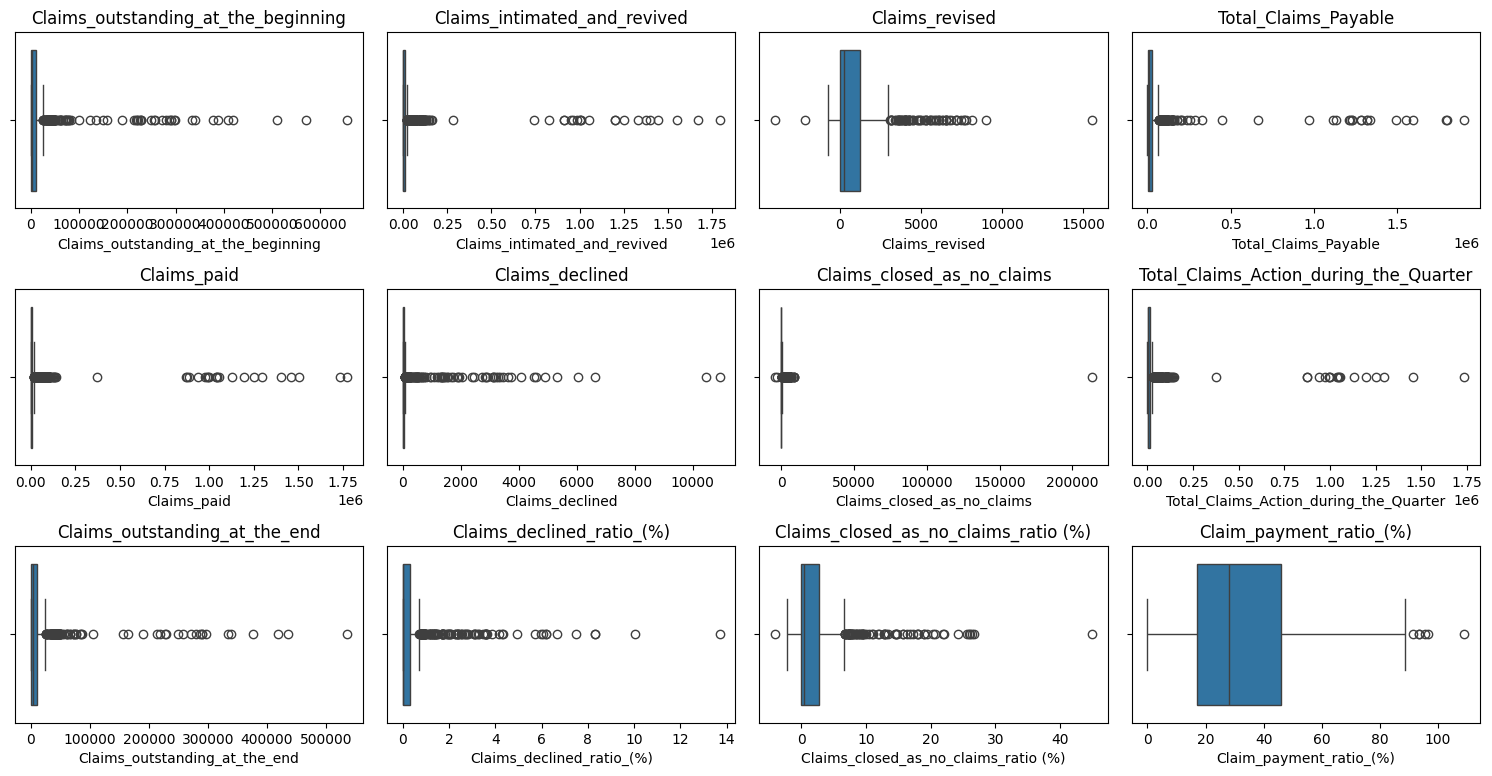

In [ ]:
# Select numerical columns for outlier analysis
numerical_cols = ['Claims_outstanding_at_the_beginning', 'Claims_intimated_and_revived',
                   'Claims_revised', 'Total_Claims_Payable', 'Claims_paid',
                   'Claims_declined', 'Claims_closed_as_no_claims',
                   'Total_Claims_Action_during_the_Quarter', 'Claims_outstanding_at_the_end',
                   'Claims_declined_ratio_(%)', 'Claims_closed_as_no_claims_ratio (%)',
                   'Claim_payment_ratio_(%)']

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Since we are dealing with number of claims we shall leave the numbers as they are and the make sure there is not ration that is greater than 100%.

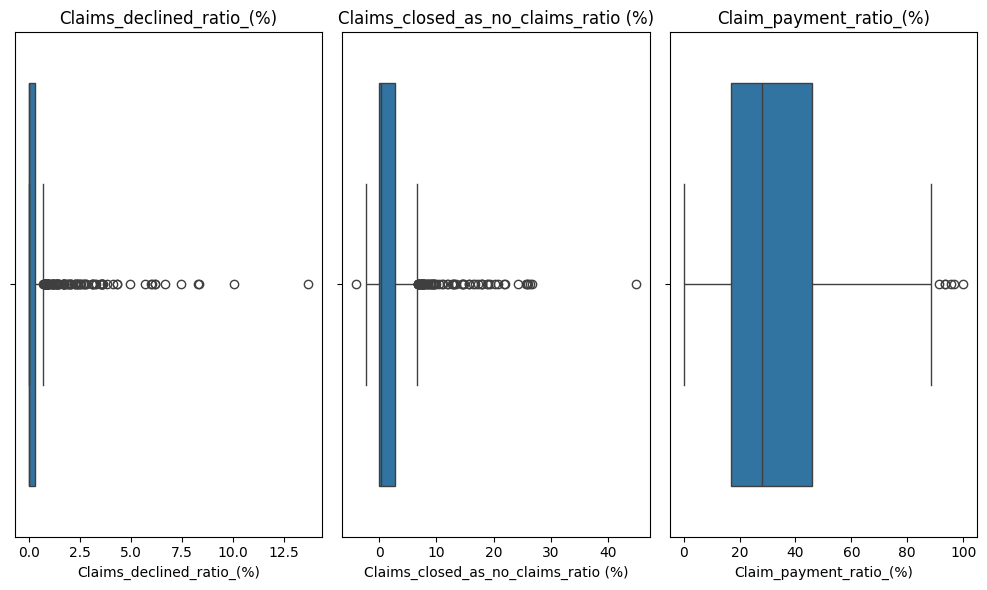

In [ ]:
# Cap ratio columns at 100%
ratio_cols = ['Claims_declined_ratio_(%)', 'Claims_closed_as_no_claims_ratio (%)', 'Claim_payment_ratio_(%)']
for col in ratio_cols:
    df[col] = df[col].clip(upper=100)

# Create box plots for ratio columns after capping
plt.figure(figsize=(10, 6))
for i, col in enumerate(ratio_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### **5. Handling Insurers Names**

We first preview the names of insurers in the Insurer column.

In [ ]:
# Check unique insurer names
unique_insurers = df['Insurer'].unique()
print(unique_insurers)

['AAR INSURANCE KENYA LIMITED' 'MADISON INSURANCE COMPANY'
 'THE KENYAN ALLIANCE INSURANCE' 'JUBILEE INSURANCE COMPANY'
 'RESOLUTION INSURANCE COMPANY' 'THE MONARCH INSURANCE COMPANY'
 'SAHAM INSURANCE COMPANY' 'APA INSURANCE COMPANY LIMITED'
 'KENINDIA ASSURANCE COMPANY' 'UAP INSURANCE COMPANY LIMITED'
 'AIG INSURANCE COMPANY LIMITED' 'PIONEER GENERAL INSURANCE'
 'INTRA-AFRICA ASSURANCE COMPANY' 'GA INSURANCE LIMITED'
 'FIRST ASSURANCE COMPANY' 'HERITAGE INSURANCE COMPANY'
 'MAYFAIR INSURANCE COMPANY' 'AFRICAN MERCHANT ASSURANCE'
 'ALLIANZ INSURANCE COMPANY' 'TAUSI ASSURANCE COMPANY'
 'PACIS INSURANCE COMPANY' 'OCCIDENTAL INSURANCE COMPANY'
 'TAKAFUL INSURANCE OF AFRICA' 'CIC GENERAL INSURANCE COMPANY'
 'DIRECTLINE ASSURANCE COMPANY' 'PHOENIX OF EAST AFRICA INSURANCE'
 'CANNON ASSURANCE COMPANY' 'GEMINIA INSURANCE COMPANY'
 'BRITAM GENERAL INSURANCE' 'SANLAM GENERAL INSURANCE'
 'INVESCO ASSURANCE COMPANY' 'TRIDENT INSURANCE COMPANY'
 'ICEA LION GENERAL INSURANCE' 'KENYA ORIENT INSURAN

Most of the insurer names have been written in different variations so we well ensure that every insurer has a consistent name.

In [ ]:
# Replace variations of insurer names with consistent ones
df['Insurer'] = df['Insurer'].replace({
    'APA INSURANCE CO. LTD': 'APA INSURANCE COMPANY LIMITED',
    ' APA INSURANCE COMPANY LIMITED':'APA INSURANCE COMPANY LIMITED',
    ' APA INSURANCE COMPANY LIMITED ': 'APA INSURANCE COMPANY LIMITED',
    'AAR INSURANCE KENYA LTD': 'AAR INSURANCE COMPANY LIMITED',
    ' AAR INSURANCE KENYA LIMITED ': 'AAR INSURANCE COMPANY LIMITED',
    'AAR INSURANCE COMPANY LIMITED': 'AAR INSURANCE COMPANY LIMITED',
    'AAR INSURANCE COMPANY LIMITED': 'AAR INSURANCE COMPANY LIMITED',
    'AAR INSURANCE KENYA LIMITED': 'AAR INSURANCE COMPANY LIMITED',
    'AFRICAN MERCHANT ASSURANCE': 'AFRICAN MERCHANT ASSURANCE COMPANY LIMITED',
    'AFRICAN MERCHANT ASSURANCE*':'AFRICAN MERCHANT ASSURANCE COMPANY LIMITED',
    ' AFRICAN MERCHANT ASSURANCE COMPANY LIMITED ': 'AFRICAN MERCHANT ASSURANCE COMPANY LIMITED',
    'AFRICAN MERCHANT ASSURANCE COMPANY LIMITED': 'AFRICAN MERCHANT ASSURANCE COMPANY LIMITED',
    ' AIG INSURANCE COMPANY LIMITED ': 'AIG KENYA INSURANCE COMPANY LIMITED',
    'AIG INSURANCE COMPANY LIMITED': 'AIG KENYA INSURANCE COMPANY LIMITED',
    'ALLIANZ INSURANCE COMPANY': 'ALLIANZ INSURANCE COMPANY LIMITED',
    ' ALLIANZ INSURANCE COMPANY LIMITED ': 'ALLIANZ INSURANCE COMPANY LIMITED',
    'ALLIANZ INSURANCE COMPANY ': 'ALLIANZ INSURANCE COMPANY LIMITED',
    'ALLIANZ INSURANCE COMPANY LIMITED': 'ALLIANZ INSURANCE COMPANY LIMITED',
    'BRITAM GENERAL INSURANCE':'BRITAM GENERAL INSURANCE COMPANY (K) LTD',
    'BRITAM GENERAL INSURANCE ':'BRITAM GENERAL INSURANCE COMPANY (K) LTD',
    ' BRITAM GENERAL INSURANCE COMPANY (K) LTD ':'BRITAM GENERAL INSURANCE COMPANY (K) LTD',
    'CANNON ASSURANCE COMPANY': 'CANNON GENERALINSURANCE COMPANY LIMITED',
    'METROPOLITAN CANNON GENERAL': 'CANNON GENERALINSURANCE COMPANY LIMITED',
    'CANNON GENERAL INSURANCE': 'CANNON GENERALINSURANCE COMPANY LIMITED',
    ' CANNON GENERAL INSURANCE (K) LIMITED ': 'CANNON GENERALINSURANCE COMPANY LIMITED',
    'CANNON GENERALINSURANCE COMPANY LIMITED': 'CANNON GENERALINSURANCE COMPANY LIMITED',
    'CANNON GENERAL INSURANCE (K) LIMITED': 'CANNON GENERALINSURANCE COMPANY LIMITED',
    'CIC GENERAL INSURANCE LTD': 'CIC GENERAL INSURANCE LIMITED',
    'CIC GENERAL INSURANCE COMPANY': 'CIC GENERAL INSURANCE LIMITED',
    ' CIC GENERAL INSURANCE COMPANY LIMITED ': 'CIC GENERAL INSURANCE LIMITED',
    'CIC GENERAL INSURANCE COMPANY LIMITED': 'CIC GENERAL INSURANCE LIMITED',
    'CORPORATE INSURANCE COMPANY':'CORPORATE INSURANCE COMPANY LIMITED',
    'CORPORATE INSURANCE COMPANY*':'CORPORATE INSURANCE COMPANY LIMITED',
    ' CORPORATE INSURANCE COMPANY LIMITED-GENERAL ': 'CORPORATE INSURANCE COMPANY LIMITED',
    'CORPORATE INSURANCE COMPANY LIMITED-GENERAL': 'CORPORATE INSURANCE COMPANY LIMITED',
    'DIRECTLINE ASSURANCE COMPANY': 'DIRECTLINE ASSURANCE COMPANY LIMITED',
    'DIRECTLINE ASSURANCE COMPANY*': 'DIRECTLINE ASSURANCE COMPANY LIMITED',
    'DIRECTLINE ASSURANCE COMPANY LIMITED': 'DIRECTLINE ASSURANCE COMPANY LIMITED',
    ' DIRECTLINE ASSURANCE COMPANY LTD ': 'DIRECTLINE ASSURANCE COMPANY LIMITED',
    'DIRECTLINE ASSURANCE COMPANY LTD': 'DIRECTLINE ASSURANCE COMPANY LIMITED',
    'FIDELITY SHIELD INSURANCE': 'FIDELITY SHIELD INSURANCE COMPANY LIMITED',
    'FIDELITY SHIELD INSURANCE ': 'FIDELITY SHIELD INSURANCE COMPANY LIMITED',
    ' FIDELITY SHIELD INSURANCE COMPANY LIMITED ': 'FIDELITY SHIELD INSURANCE COMPANY LIMITED',
    'FIDELITY SHIELD INSURANCE COMPANY LIMITED': 'FIDELITY SHIELD INSURANCE COMPANY LIMITED',
    'FIRST ASSURANCE COMPANY': 'FIRST ASSURANCE COMPANY LIMITED',
    'FIRST ASSURANCE COMPANY ': 'FIRST ASSURANCE COMPANY LIMITED',
     'FIRST ASSURANCE COMPANY*': 'FIRST ASSURANCE COMPANY LIMITED',
    ' FIRST ASSURANCE COMPANY LIMITED-GENERAL ': 'FIRST ASSURANCE COMPANY LIMITED',
    'FIRST ASSURANCE COMPANY LIMITED-GENERAL': 'FIRST ASSURANCE COMPANY LIMITED',
    'GA INSURANCE LIMITED': 'GA INSURANCE LIMITED',
    ' GA INSURANCE LIMITED ': 'GA INSURANCE LIMITED',
     'GEMINIA INSURANCE COMPANY': 'GEMINIA INSURANCE COMPANY LIMITED',
    ' GEMINIA INSURANCE COMPANY LIMITED-GENERAL ': 'GEMINIA INSURANCE COMPANY LIMITED',
    'GEMINIA INSURANCE COMPANY LIMITED-GENERAL': 'GEMINIA INSURANCE COMPANY LIMITED',
    'ICEA LION GENERAL INSURANCE': 'ICEA LION GENERAL INSURANCE COMPANY LIMITED',
    'ICEA LION GENERAL INSURANCE ': 'ICEA LION GENERAL INSURANCE COMPANY LIMITED',
    ' ICEA LION GENERAL INSURANCE COMPANY LTD ':'ICEA LION GENERAL INSURANCE COMPANY LIMITED',
    'ICEA LION GENERAL INSURANCE COMPANY LTD': 'ICEA LION GENERAL INSURANCE COMPANY LIMITED',
    'INTRA-AFRICA ASSURANCE COMPANY': 'INTRA AFRICA ASSURANCE COMPANY LIMITED',
    ' INTRA-AFRICA ASSURANCE COMPANY LIMITED ': 'INTRA AFRICA ASSURANCE COMPANY LIMITED',
    'INTRA-AFRICA ASSURANCE COMPANY LIMITED': 'INTRA AFRICA ASSURANCE COMPANY LIMITED',
    'INVESCO ASSURANCE COMPANY': 'INVESCO ASSURANCE COMPANY LIMITED',
    'INVESCO ASSURANCE COMPANY*': 'INVESCO ASSURANCE COMPANY LIMITED',
    ' INVESCO ASSURANCE COMPANY LIMITED ': 'INVESCO ASSURANCE COMPANY LIMITED',
    'INVESCO ASSURANCE COMPANY LIMITED': 'INVESCO ASSURANCE COMPANY LIMITED',
    ' JUBILEE ALLIANZ GENERAL INSURANCE LTD ': 'JUBILEE ALLIANZ GENERAL INSURANCE LIMITED',
    'JUBILEE ALLIANZ GENERAL INSURANCE LTD': 'JUBILEE ALLIANZ GENERAL INSURANCE LIMITED',
    'JUBILEE INSURANCE COMPANY':'JUBILEE ALLIANZ GENERAL INSURANCE LIMITED',
    'JUBILEE HEALTH INSURANCE': 'JUBILEE HEALTH INSURANCE LIMITED',
    ' JUBILEE HEALTH INSURANCE LTD ': 'JUBILEE HEALTH INSURANCE LIMITED',
    'JUBILEE HEALTH INSURANCE LTD': 'JUBILEE HEALTH INSURANCE LIMITED',
    'KENINDIA ASSURANCE COMPANY': 'KENINDIA ASSURANCE COMPANY LIMITED',
    'KENINDIA ASSURANCE COMPANY ': 'KENINDIA ASSURANCE COMPANY LIMITED',
    ' KENINDIA ASSURANCE COMPANY LIMITED-GENERAL ': 'KENINDIA ASSURANCE COMPANY LIMITED',
    'KENINDIA ASSURANCE COMPANY LIMITED-GENERAL': 'KENINDIA ASSURANCE COMPANY LIMITED',
    'KENYA ORIENT INSURANCE COMPANY': 'KENYA ORIENT INSURANCE LIMITED',
    ' KENYA ORIENT INSURANCE COMPANY LIMITED ':'KENYA ORIENT INSURANCE LIMITED',
    'KENYA ORIENT INSURANCE COMPANY LIMITED': 'KENYA ORIENT INSURANCE LIMITED',
    'MADISON INSURANCE COMPANY': 'MADISON GENERAL INSURANCE KENYA LIMITED',
    ' MADISON GENERAL INSURANCE COMPANY LIMITED ': 'MADISON GENERAL INSURANCE KENYA LIMITED',
    'MADISON GENERAL INSURANCE COMPANY LIMITED': 'MADISON GENERAL INSURANCE KENYA LIMITED',
    'MAYFAIR INSURANCE COMPANY': 'MAYFAIR INSURANCE COMPANY LIMITED',
    ' MAYFAIR INSURANCE COMPANY LIMITED ': 'MAYFAIR INSURANCE COMPANY LIMITED',
    'MAYFAIR INSURANCE COMPANY LIMITED': 'MAYFAIR INSURANCE COMPANY LIMITED',
    'MUA INSURANCE COMPANY': 'MUA INSURANCE(KENYA) LIMITED',
    ' MUA INSURANCE (KENYA) LIMITED ': 'MUA INSURANCE(KENYA) LIMITED',
    'MUA INSURANCE (KENYA) LIMITED': 'MUA INSURANCE(KENYA) LIMITED',
    'OCCIDENTAL INSURANCE COMPANY': 'OCCIDENTAL INSURANCE COMPANY LIMITED',
    ' OCCIDENTAL INSURANCE COMPANY LIMITED ': 'OCCIDENTAL INSURANCE COMPANY LIMITED',
      'OCCIDENTAL INSURANCE COMPANY LIMITED': 'OCCIDENTAL INSURANCE COMPANY LIMITED',
    'OLD MUTUAL GENERAL INSURANCE': 'OLD MUTUAL GENERAL INSURANCE KENYA LIMITED',
    ' OLD MUTUAL GENERAL INSURANCE  KENYA LIMITED ': 'OLD MUTUAL GENERAL INSURANCE KENYA LIMITED',
    'OLD MUTUAL GENERAL INSURANCE  KENYA LIMITED': 'OLD MUTUAL GENERAL INSURANCE KENYA LIMITED',
    'PACIS INSURANCE COMPANY': 'PACIS INSURANCE COMPANY LIMITED',
   ' PACIS INSURANCE COMPANY LIMITED ': 'PACIS INSURANCE COMPANY LIMITED',
    'PACIS INSURANCE COMPANY LIMITED': 'PACIS INSURANCE COMPANY LIMITED',
    'PIONEER GENERAL INSURANCE': 'PIONEER GENERAL INSURANCE LIMITED',
    'PIONEER GENERAL INSURANCE ': 'PIONEER GENERAL INSURANCE LIMITED',
    ' PIONEER GENERAL INSURANCE LIMITED ': 'PIONEER GENERAL INSURANCE LIMITED',
    'PIONEER GENERAL INSURANCE LIMITED': 'PIONEER GENERAL INSURANCE LIMITED',
    'SAHAM INSURANCE COMPANY': 'SAHAM INSURANCE COMPANY LIMITED',
    ' SAHAM INSURANCE COMPANY LIMITED ': 'SAHAM INSURANCE COMPANY LIMITED',
   'SAHAM INSURANCE COMPANY ': 'SAHAM INSURANCE COMPANY LIMITED',
    ' SANLAM GENERAL INSURANCE LIMITED ': 'SANLAM GENERAL INSURANCE COMPANY LIMITED',
    'SANLAM GENERAL INSURANCE LIMITED': 'SANLAM GENERAL INSURANCE COMPANY LIMITED',
    'SANLAM GENERAL INSURANCE': 'SANLAM GENERAL INSURANCE COMPANY LIMITED',
    'STAR DISCOVER INSURANCE': 'STAR DISCOVER INSURANCE LIMITED',
    ' STAR DISCOVER INSURANCE LIMITED ': 'STAR DISCOVER INSURANCE LIMITED',
    ' STAR DISCOVER MICRO INSURANCE LIMITED ': 'STAR DISCOVER INSURANCE LIMITED',
    'STAR DISCOVER INSURANCE LIMITED': 'STAR DISCOVER INSURANCE LIMITED',
    'STAR DISCOVER MICRO INSURANCE LIMITED': 'STAR DISCOVER INSURANCE LIMITED',
    'TAKAFUL INSURANCE OF AFRICA': 'TAKAFUL INSURANCE OF AFRICA LIMITED',
    'TAKAFUL INSURANCE OF AFRICA ': 'TAKAFUL INSURANCE OF AFRICA LIMITED',
    ' TAKAFUL INSURANCE OF AFRICA LIMITED-GENERAL ': 'TAKAFUL INSURANCE OF AFRICA LIMITED',
    'TAKAFUL INSURANCE OF AFRICA LIMITED-GENERAL': 'TAKAFUL INSURANCE OF AFRICA LIMITED',
    'TAUSI ASSURANCE COMPANY': 'TAUSI ASSURANCE COMPANY LIMITED',
    ' TAUSI ASSURANCE COMPANY LIMITED ': 'TAUSI ASSURANCE COMPANY LIMITED',
    'TAUSI ASSURANCE COMPANY LIMITED': 'TAUSI ASSURANCE COMPANY LIMITED',
    'HERITAGE INSURANCE COMPANY': 'THE HERITAGE INSURANCE COMPANY LIMITED',
    'HERITAGE INSURANCE COMPANY ': 'THE HERITAGE INSURANCE COMPANY LIMITED',
    ' HERITAGE INSURANCE COMPANY LIMITED ': 'THE HERITAGE INSURANCE COMPANY LIMITED',
    'THE HERITAGE INSURANCE COMPANY LIMITED': 'THE HERITAGE INSURANCE COMPANY LIMITED',
    'THE KENYAN ALLIANCE INSURANCE': 'THE KENYAN ALLIANCE INSURANCE COMPANY LIMITED',
    ' THE KENYAN ALLIANCE INSURANCE COMPANY LIMITED-GENERAL ': 'THE KENYAN ALLIANCE INSURANCE COMPANY LIMITED',
    'THE KENYAN ALLIANCE INSURANCE COMPANY LIMITED-GENERAL': 'THE KENYAN ALLIANCE INSURANCE COMPANY LIMITED',
    'THE MONARCH INSURANCE COMPANY': 'THE MONARCH INSURANCE COMPANY LIMITED',
    ' THE MONARCH INSURANCE COMPANY LIMITED-GENERAL ': 'THE MONARCH INSURANCE COMPANY LIMITED',
    'THE MONARCH INSURANCE COMPANY LIMITED-GENERAL': 'THE MONARCH INSURANCE COMPANY LIMITED',
    'TRIDENT INSURANCE COMPANY': 'TRIDENT INSURANCE COMPANY LIMITED',
    'TRIDENT INSURANCE COMPANY*': 'TRIDENT INSURANCE COMPANY LIMITED',
    ' TRIDENT INSURANCE COMPANY LIMITED ': 'TRIDENT INSURANCE COMPANY LIMITED',
    'TRIDENT INSURANCE COMPANY LIMITED': 'TRIDENT INSURANCE COMPANY LIMITED',
    'RESOLUTION INSURANCE COMPANY': 'RESOLUTION INSURANCE COMPANY LTD',
    'UAP INSURANCE COMPANY LIMITED': 'OLD MUTUAL GENERAL INSURANCE KENYA LIMITED',
    'PRUDENTIAL ASSURANCE COMPANY LIMITED': 'PRUDENTIAL ASSURANCE',
    'XPLICO INSURANCE COMPANY': 'XPLICO INSURANCE COMPANY LIMITED',
    'XPLICO INSURANCE COMPANY*': 'XPLICO INSURANCE COMPANY LIMITED',
    ' XPLICO INSURANCE COMPANY LIMITED ': 'XPLICO INSURANCE COMPANY LIMITED',
    'XPLICO INSURANCE COMPANY LIMITED': 'XPLICO INSURANCE COMPANY LIMITED',
})


Since Resolution Insurance Company was closed we shall drop it because it can not be recommended.

In [ ]:
#Removing Resolution Insurace Company from our dataset
df = df[df['Insurer'] != 'RESOLUTION INSURANCE COMPANY LTD']


In [ ]:
# Check unique insurer names and sort them alphabetically
unique_insurers = sorted(df['Insurer'].unique())
print(unique_insurers)


['AAR INSURANCE COMPANY LIMITED', 'AFRICAN MERCHANT ASSURANCE COMPANY LIMITED', 'AIG KENYA INSURANCE COMPANY LIMITED', 'ALLIANZ INSURANCE COMPANY LIMITED', 'APA INSURANCE COMPANY LIMITED', 'BRITAM GENERAL INSURANCE COMPANY (K) LTD', 'CANNON GENERALINSURANCE COMPANY LIMITED', 'CIC GENERAL INSURANCE LIMITED', 'CORPORATE INSURANCE COMPANY LIMITED', 'DIRECTLINE ASSURANCE COMPANY LIMITED', 'FIDELITY SHIELD INSURANCE COMPANY LIMITED', 'FIRST ASSURANCE COMPANY LIMITED', 'GA INSURANCE LIMITED', 'GEMINIA INSURANCE COMPANY LIMITED', 'HEALTHIER (K) MICRO INSURANCE', 'ICEA LION GENERAL INSURANCE COMPANY LIMITED', 'INTRA AFRICA ASSURANCE COMPANY LIMITED', 'INVESCO ASSURANCE COMPANY LIMITED', 'JUBILEE ALLIANZ GENERAL INSURANCE LIMITED', 'JUBILEE GENERAL INSURANCE', 'JUBILEE HEALTH INSURANCE LIMITED', 'KENINDIA ASSURANCE COMPANY LIMITED', 'KENYA ORIENT INSURANCE LIMITED', 'MADISON GENERAL INSURANCE KENYA LIMITED', 'MAYFAIR INSURANCE COMPANY LIMITED', 'MUA INSURANCE(KENYA) LIMITED', 'OCCIDENTAL INSURA

In [ ]:
#create quater colum and year column
df['Date'] = pd.to_datetime(df['Date'])
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year

In [ ]:
# prompt: saved cleaned data as csv to drive

from google.colab import drive
drive.mount('/content/drive')

# Assuming your cleaned DataFrame is named 'df'
df.to_csv('/content/drive/My Drive/cleaned_data.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now the insurer names have been sorted, we shall save a copy of the cleaned dataset and proceed to EDA.

In [ ]:
#Saving our cleaned data
df.to_excel('cleaned_data.xlsx', index=False)

# **EXPLORATORY DATA ANALYSIS**

Let us check for the statistical overview of the data.

The rows provide descriptive statistics including count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for each column in the dataset. We will then perform various analysis i.e univariate, bivariate and multivariate.

In [ ]:
df.describe()

,Date,Claims_outstanding_at_the_beginning,Claims_intimated_and_revived,Claims_revised,Total_Claims_Payable,Claims_paid,Claims_declined,Claims_closed_as_no_claims,Total_Claims_Action_during_the_Quarter,Claims_outstanding_at_the_end,Claims_declined_ratio_(%),Claims_closed_as_no_claims_ratio (%),Claim_payment_ratio_(%),Quarter,Year
count,769,762.000000,7.640000e+02,726.000000,7.250000e+02,7.640000e+02,697.000000,710.000000,6.710000e+02,671.000000,664.000000,670.000000,705.000000,769.000000,769.000000
mean,2021-04-19 00:39:19.427828480,20548.400262,4.458980e+04,1016.562270,5.695926e+04,4.347321e+04,138.644189,731.466197,4.075270e+04,17833.622951,0.407250,2.396565,32.636119,2.668401,2020.634590
min,2018-06-30 00:00:00,0.000000,0.000000e+00,-99.000000,0.000000e+00,0.000000e+00,0.000000,-4137.000000,0.000000e+00,-6.000000,0.000000,-4.043237,0.000000,1.000000,2018.000000
25%,2019-09-30 00:00:00,1085.250000,5.182500e+02,0.000000,2.206000e+03,3.777500e+02,0.000000,0.000000,6.590000e+02,1059.000000,0.000000,0.000000,16.690127,2.000000,2019.000000
50%,2020-12-31 00:00:00,3014.500000,1.436000e+03,250.000000,6.569000e+03,1.295500e+03,0.000000,23.000000,2.666000e+03,3104.000000,0.000000,0.399537,27.704599,3.000000,2020.000000
75%,2022-12-31 00:00:00,10065.750000,5.655750e+03,1257.000000,2.370800e+04,6.518500e+03,23.000000,165.750000,9.326000e+03,9362.000000,0.250429,2.784786,44.408337,4.000000,2022.000000
max,2024-03-31 00:00:00,655660.000000,1.792863e+06,15544.000000,1.900167e+06,1.774086e+06,10449.000000,213472.000000,1.734896e+06,535934.000000,13.696826,44.902549,100.000000,4.000000,2024.000000
std,NaN,62948.650799,1.969971e+05,1654.753291,2.193127e+05,1.954260e+05,622.448017,8099.339480,1.782674e+05,53505.940852,1.160716,4.655247,22.176284,1.083999,1.835103


## **Univariate Analysis.**

In [ ]:
df.columns

Index(['Date', 'Insurer', 'Claims_outstanding_at_the_beginning',
       'Claims_intimated_and_revived', 'Claims_revised',
       'Total_Claims_Payable', 'Claims_paid', 'Claims_declined',
       'Claims_closed_as_no_claims', 'Total_Claims_Action_during_the_Quarter',
       'Claims_outstanding_at_the_end', 'Claims_declined_ratio_(%)',
       'Claims_closed_as_no_claims_ratio (%)', 'Claim_payment_ratio_(%)',
       'Quarter', 'Year'],
      dtype='object')

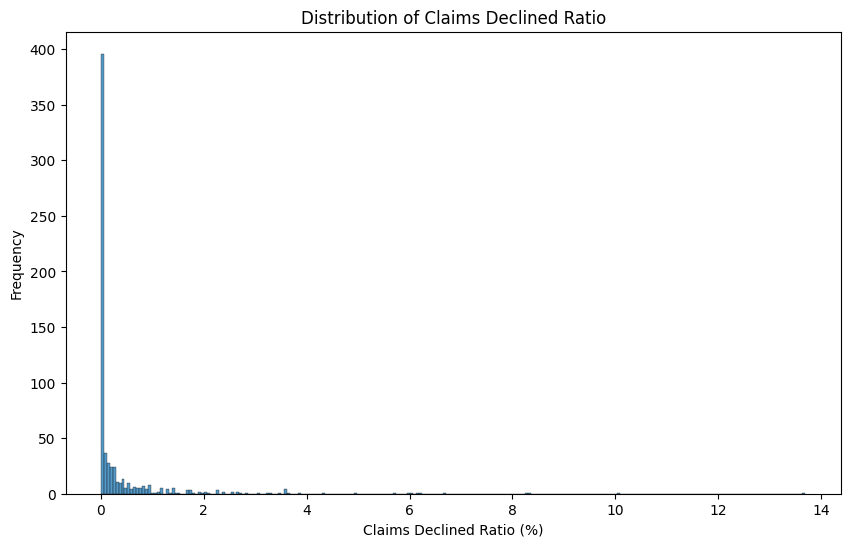

In [ ]:
# Distribution of Claims Declined Ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['Claims_declined_ratio_(%)'])
plt.title('Distribution of Claims Declined Ratio')
plt.xlabel('Claims Declined Ratio (%)')
plt.ylabel('Frequency')
plt.show()


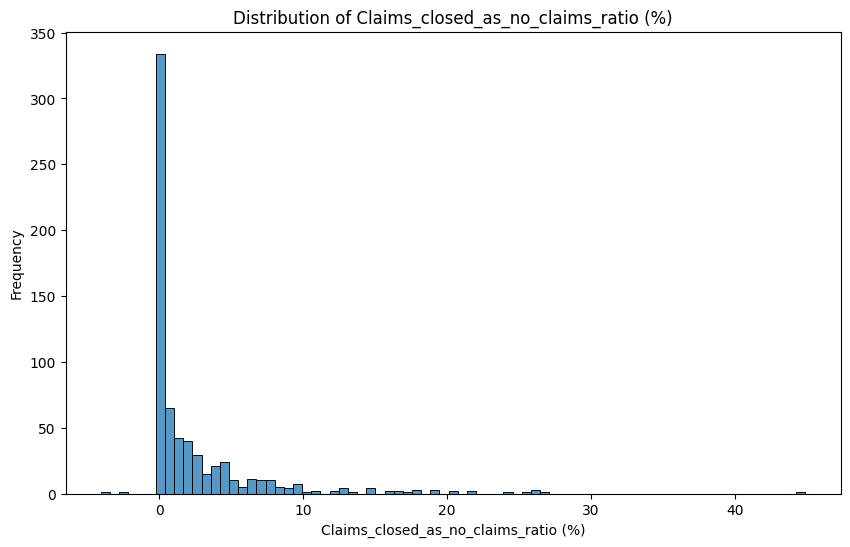

In [ ]:
# Distribution of Claims closed as no closed ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['Claims_closed_as_no_claims_ratio (%)'])
plt.title('Distribution of Claims_closed_as_no_claims_ratio (%)')
plt.xlabel('Claims_closed_as_no_claims_ratio (%)')
plt.ylabel('Frequency')
plt.show()


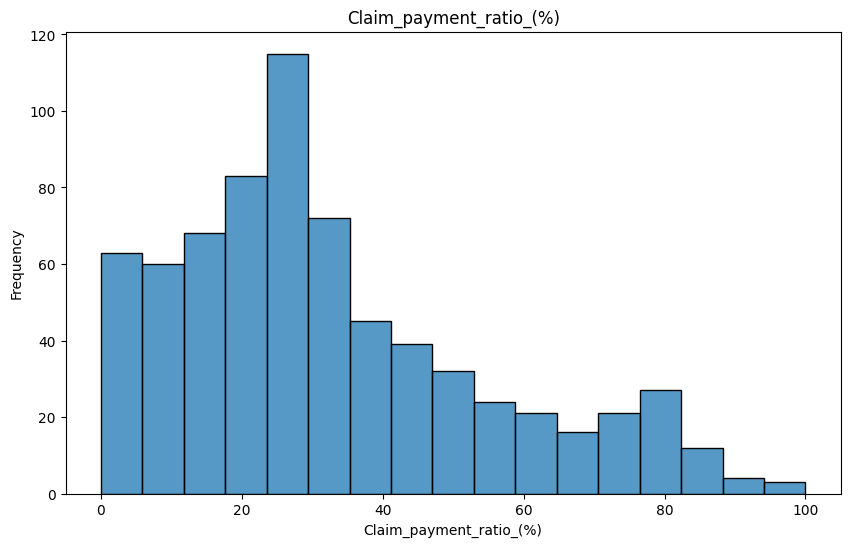

In [ ]:
# Distribution of Claims payment Ratio.
plt.figure(figsize=(10, 6))
sns.histplot(df['Claim_payment_ratio_(%)'])
plt.title('Claim_payment_ratio_(%)')
plt.xlabel('Claim_payment_ratio_(%)')
plt.ylabel('Frequency')
plt.show()


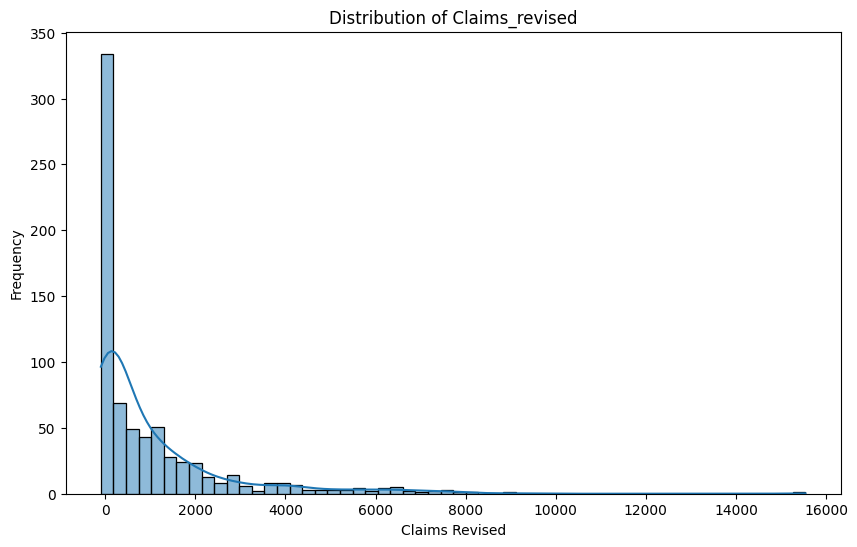

In [ ]:
#Distribution of claims revised
plt.figure(figsize=(10, 6))
sns.histplot(df['Claims_revised'], kde=True)
plt.title('Distribution of Claims_revised')
plt.xlabel('Claims Revised')
plt.ylabel('Frequency')
plt.show()


The above graph shows most claims have a revision amount close to zero. It is skewed to the right showing there are more claims that were revised upwards than the negative ones.

## **Bivariate Analysis**


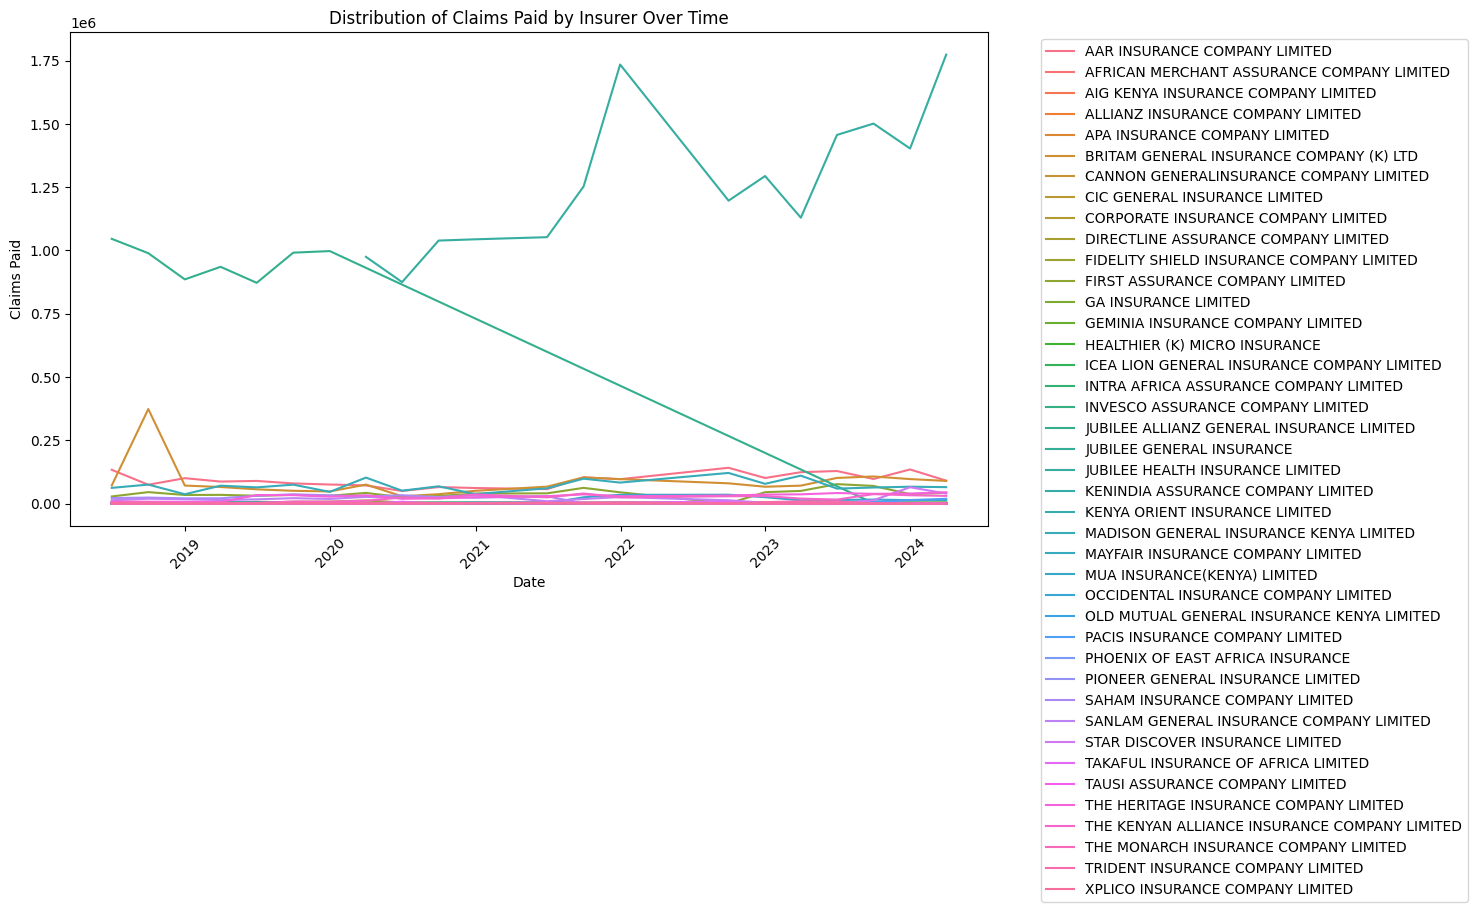

In [ ]:
# prompt: code for distibution of claims paid by insurer overtime

# Group the data by insurer and period and sum the claims paid
claims_paid_by_insurer_period = df.groupby(['Insurer', 'Date'])['Claims_paid'].sum().reset_index()

# Create a line plot to show the distribution of claims paid by insurer over time
plt.figure(figsize=(15, 8))
sns.lineplot(x='Date', y='Claims_paid', hue='Insurer', data=claims_paid_by_insurer_period)
plt.title('Distribution of Claims Paid by Insurer Over Time')
plt.xlabel('Date')
plt.ylabel('Claims Paid')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


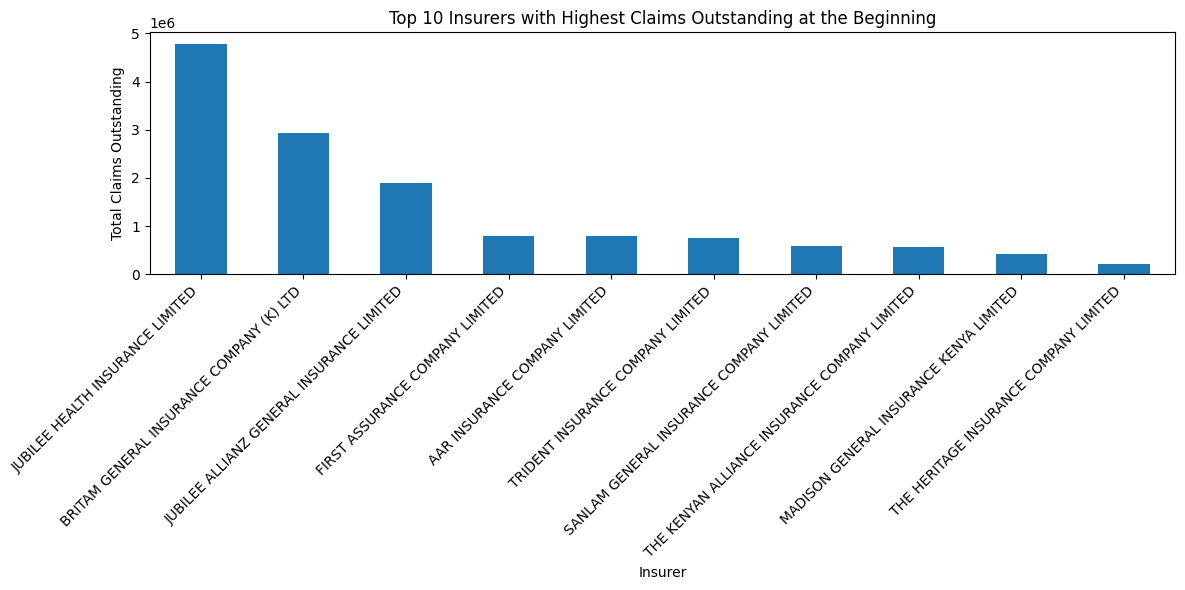

In [ ]:
#top 10 claims outstanding at the beginning of every quarter

# Group the data by insurer and sum the claims outstanding at the beginning
top_10_outstanding = df.groupby('Insurer')['Claims_outstanding_at_the_beginning'].sum().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_10_outstanding.plot(kind='bar')
plt.title('Top 10 Insurers with Highest Claims Outstanding at the Beginning')
plt.xlabel('Insurer')
plt.ylabel('Total Claims Outstanding')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


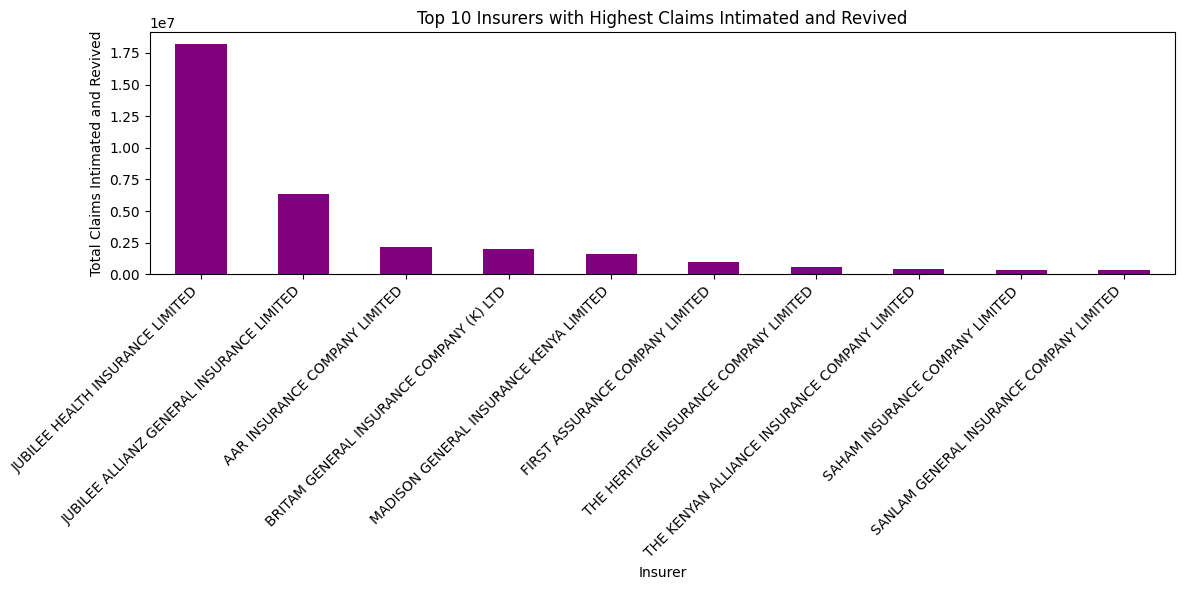

In [ ]:
#top 10 insurance company with the most claims intimated and revived
top_10_revived = df.groupby('Insurer')['Claims_intimated_and_revived'].sum().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_10_revived.plot(kind='bar', color = 'purple')
plt.title('Top 10 Insurers with Highest Claims Intimated and Revived')
plt.xlabel('Insurer')
plt.ylabel('Total Claims Intimated and Revived')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

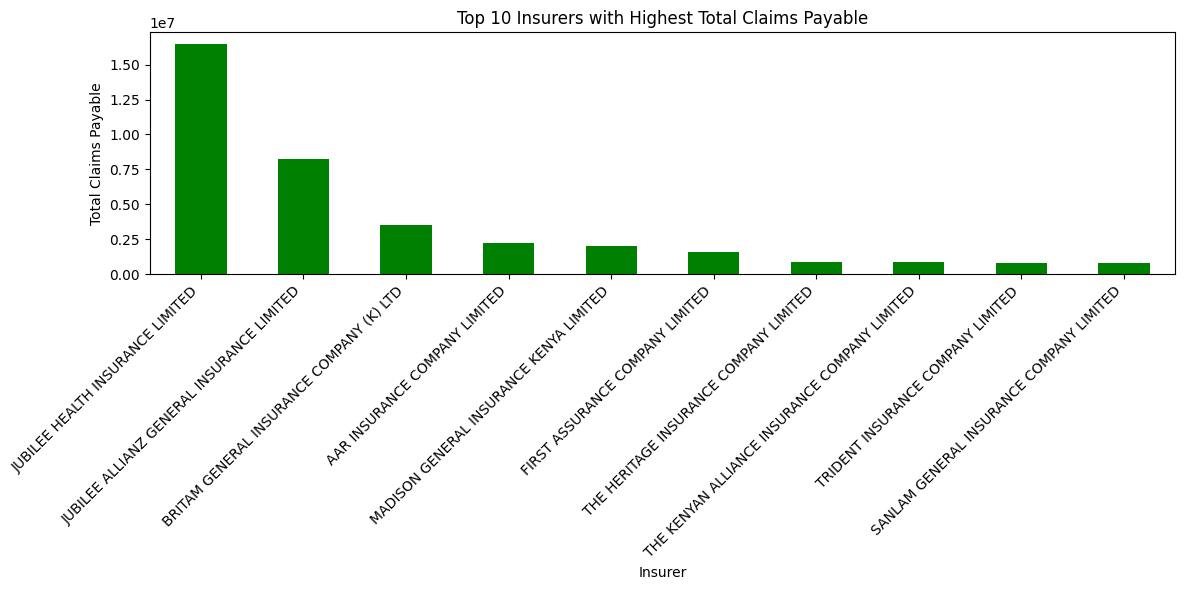

In [ ]:
#top 10 insurance company with the most total claims payable.
top_10_payable = df.groupby('Insurer')['Total_Claims_Payable'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_payable.plot(kind='bar', color = 'green')
plt.title('Top 10 Insurers with Highest Total Claims Payable')
plt.xlabel('Insurer')
plt.ylabel('Total Claims Payable')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

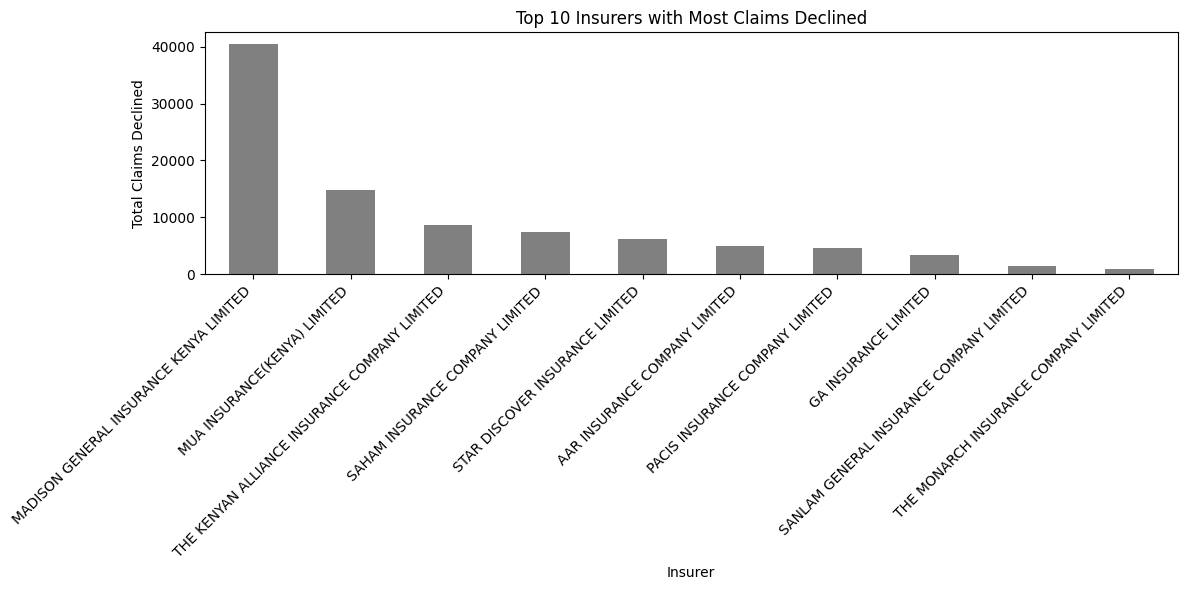

In [ ]:
#top 10 insurers with most claims declined

# Group the data by insurer and sum the claims declined
top_10_declined = df.groupby('Insurer')['Claims_declined'].sum().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_10_declined.plot(kind='bar', color = 'grey')
plt.title('Top 10 Insurers with Most Claims Declined')
plt.xlabel('Insurer')
plt.ylabel('Total Claims Declined')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


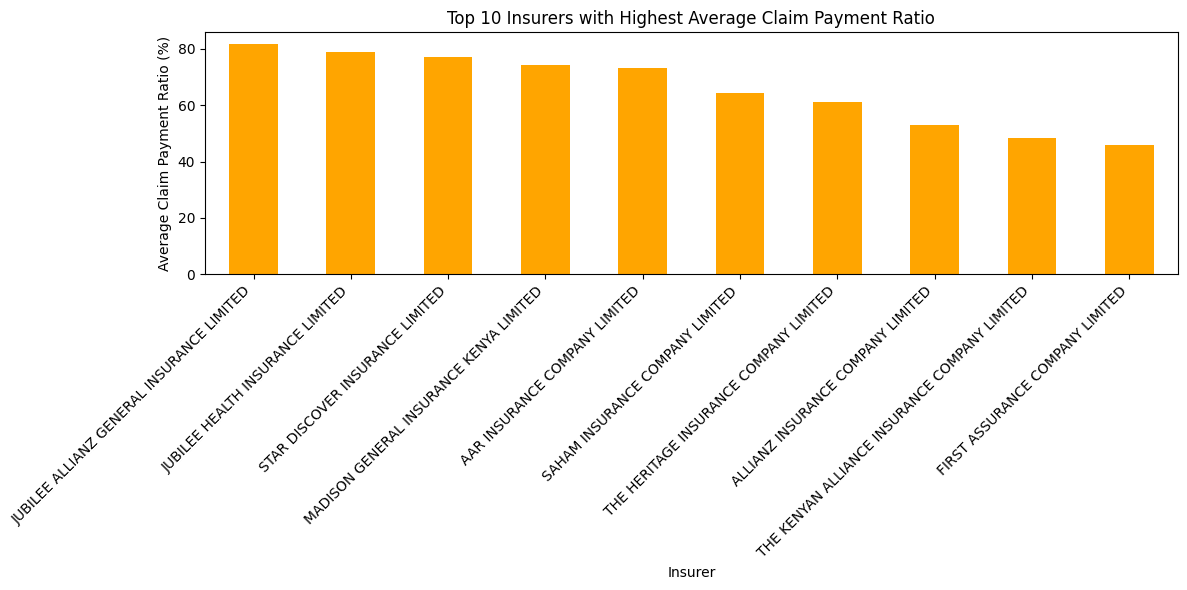

In [ ]:
#top 10 insurers with highest claim payment ratio

# Group the data by insurer and calculate the average claim payment ratio
top_10_payment_ratio = df.groupby('Insurer')['Claim_payment_ratio_(%)'].mean().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_10_payment_ratio.plot(kind='bar', color='orange')
plt.title('Top 10 Insurers with Highest Average Claim Payment Ratio')
plt.xlabel('Insurer')
plt.ylabel('Average Claim Payment Ratio (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,Date,Insurer,Claims_outstanding_at_the_beginning,Claims_intimated_and_revived,Claims_revised,Total_Claims_Payable,Claims_paid,Claims_declined,Claims_closed_as_no_claims,Total_Claims_Action_during_the_Quarter,Claims_outstanding_at_the_end,Claims_declined_ratio_(%),Claims_closed_as_no_claims_ratio (%),Claim_payment_ratio_(%),Quarter,Year
0,2018-06-30,AAR INSURANCE COMPANY LIMITED,26026.0,129415.0,0.0,155441.0,133313.0,512.0,3630.0,137455.0,17986.0,0.329385,2.335291,85.764374,2,2018
1,2018-06-30,MADISON GENERAL INSURANCE KENYA LIMITED,8078.0,67173.0,0.0,75251.0,62025.0,2713.0,0.0,64738.0,10513.0,3.605268,0.000000,82.424154,2,2018
2,2018-06-30,THE KENYAN ALLIANCE INSURANCE COMPANY LIMITED,188.0,735.0,0.0,923.0,740.0,32.0,0.0,772.0,151.0,3.466956,0.000000,80.173348,2,2018
3,2018-06-30,JUBILEE ALLIANZ GENERAL INSURANCE LIMITED,407645.0,910498.0,66.0,1318209.0,1046058.0,0.0,973.0,1047097.0,271112.0,0.000000,0.073812,79.354488,2,2018
5,2018-06-30,THE MONARCH INSURANCE COMPANY LIMITED,533.0,766.0,1.0,1300.0,894.0,40.0,0.0,935.0,365.0,3.076923,0.000000,68.769231,2,2018


In [ ]:
#save df to drive
df.to_csv('/content/drive/My Drive/df.csv', index=False)

In [ ]:
df.shape

(769, 16)

In [ ]:
# Group data by insurer and date, calculate mean claim payment ratio
grouped_data = df.groupby(['Insurer', 'Date'])['Claim_payment_ratio_(%)'].mean().reset_index()

# Create a line plot using Plotly
fig = go.Figure()
for insurer in grouped_data['Insurer'].unique():
    insurer_data = grouped_data[grouped_data['Insurer'] == insurer]
    fig.add_trace(go.Scatter(x=insurer_data['Date'], y=insurer_data['Claim_payment_ratio_(%)'], mode='lines+markers', name=insurer))

fig.update_layout(title='Claims Payment Ratio by Insurer Over Time',
                  xaxis_title='Date',
                  yaxis_title='Claim Payment Ratio (%)')
fig.show()


In [ ]:
df.shape

(769, 16)

In [ ]:
#label encoding the insurer column

label_encoder = LabelEncoder()
df['Insurer_Encoded'] = label_encoder.fit_transform(df['Insurer'])
df.head()

,Date,Insurer,Claims_outstanding_at_the_beginning,Claims_intimated_and_revived,Claims_revised,Total_Claims_Payable,Claims_paid,Claims_declined,Claims_closed_as_no_claims,Total_Claims_Action_during_the_Quarter,Claims_outstanding_at_the_end,Claims_declined_ratio_(%),Claims_closed_as_no_claims_ratio (%),Claim_payment_ratio_(%),Quarter,Year,Insurer_Encoded
0,2018-06-30,AAR INSURANCE COMPANY LIMITED,26026.0,129415.0,0.0,155441.0,133313.0,512.0,3630.0,137455.0,17986.0,0.329385,2.335291,85.764374,2,2018,0
1,2018-06-30,MADISON GENERAL INSURANCE KENYA LIMITED,8078.0,67173.0,0.0,75251.0,62025.0,2713.0,0.0,64738.0,10513.0,3.605268,0.000000,82.424154,2,2018,23
2,2018-06-30,THE KENYAN ALLIANCE INSURANCE COMPANY LIMITED,188.0,735.0,0.0,923.0,740.0,32.0,0.0,772.0,151.0,3.466956,0.000000,80.173348,2,2018,37
3,2018-06-30,JUBILEE ALLIANZ GENERAL INSURANCE LIMITED,407645.0,910498.0,66.0,1318209.0,1046058.0,0.0,973.0,1047097.0,271112.0,0.000000,0.073812,79.354488,2,2018,18
5,2018-06-30,THE MONARCH INSURANCE COMPANY LIMITED,533.0,766.0,1.0,1300.0,894.0,40.0,0.0,935.0,365.0,3.076923,0.000000,68.769231,2,2018,38


In [ ]:
df.shape

(769, 18)

#### **a) Feature Engineering**

We are going to create a reliability score from the ratios columns.


In [ ]:
# Set 'Claim Payment Ratio' as the target variable
df['Claim Payment Ratio'] = df['Claim_payment_ratio_(%)']  # Convert to a fraction

# Defining features (excluding 'Claim Payment Ratio' and date/identifier columns)
features = df.drop(columns=['Date','Insurer', 'Claim_payment_ratio_(%)', 'Claim Payment Ratio'])

# Defining target variable
target = df['Claim Payment Ratio']

# Check the features and target
print(features.head())
print(target.head())


   Claims_outstanding_at_the_beginning  Claims_intimated_and_revived  \
0                              26026.0                      129415.0   
1                               8078.0                       67173.0   
2                                188.0                         735.0   
3                             407645.0                      910498.0   
5                                533.0                         766.0   

   Claims_revised  Total_Claims_Payable  Claims_paid  Claims_declined  \
0             0.0              155441.0     133313.0            512.0   
1             0.0               75251.0      62025.0           2713.0   
2             0.0                 923.0        740.0             32.0   
3            66.0             1318209.0    1046058.0              0.0   
5             1.0                1300.0        894.0             40.0   

   Claims_closed_as_no_claims  Total_Claims_Action_during_the_Quarter  \
0                      3630.0                          

In [ ]:
features.shape

(769, 14)

In [ ]:
# prompt: save features to drive as csv

features.to_csv('/content/drive/My Drive/features.csv', index=False)


In [ ]:
# prompt: save Insurer_Encoded column to drive

# Assuming 'df' is your DataFrame with the 'Insurer_Encoded' column
features[['Insurer_Encoded']].to_csv('/content/drive/My Drive/insurer_encoded.csv', index=False)


# **Data Preprocessing**



This includes splitting the dataset, normalize/standardize the data, performing one hot encoding and label encoding and addressing multicollinearity.

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (615, 12)
X_test shape: (154, 12)
y_train shape: (615,)
y_test shape: (154,)


### **Normalizing and Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Normalize the features
normalized_features = scaler.fit_transform(features)

# Convert normalized features back to a DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns)

# Check the normalized features
print(normalized_features_df.head())

   Claims_outstanding_at_the_beginning  Claims_intimated_and_revived  \
0                             0.087074                      0.430873   
1                            -0.198234                      0.114712   
2                            -0.323657                     -0.222762   
3                             6.153442                      4.398418   
4                            -0.318173                     -0.222605   

   Claims_revised  Total_Claims_Payable  Claims_paid  Claims_declined  \
0       -0.614752              0.449357     0.460014         0.600249   
1       -0.614752              0.083462     0.094992         4.138827   
2       -0.614752             -0.255685    -0.218810        -0.171453   
3       -0.574840              5.754889     5.133612        -0.222900   
4       -0.614147             -0.253965    -0.218022        -0.158592   

   Claims_closed_as_no_claims  Total_Claims_Action_during_the_Quarter  \
0                    0.358125                          

In [ ]:
print(normalized_features_df.shape)

(769, 12)


In [ ]:
normalized_features_df.head()


,Claims_outstanding_at_the_beginning,Claims_intimated_and_revived,Claims_revised,Total_Claims_Payable,Claims_paid,Claims_declined,Claims_closed_as_no_claims,Total_Claims_Action_during_the_Quarter,Claims_outstanding_at_the_end,Claims_declined_ratio_(%),Claims_closed_as_no_claims_ratio (%),Insurer_Encoded
0,0.087074,0.430873,-0.614752,0.449357,0.460014,0.600249,0.358125,0.542861,0.002850,-0.067134,-0.013172,-1.629182
1,-0.198234,0.114712,-0.614752,0.083462,0.094992,4.138827,-0.090376,0.134647,-0.136921,2.757288,-0.515194,0.263327
2,-0.323657,-0.222762,-0.614752,-0.255685,-0.218810,-0.171453,-0.090376,-0.224441,-0.330726,2.638038,-0.515194,1.415289
3,6.153442,4.398418,-0.574840,5.754889,5.133612,-0.222900,0.029842,5.649351,4.737181,-0.351126,-0.499327,-0.148088
4,-0.318173,-0.222605,-0.614147,-0.253965,-0.218022,-0.158592,-0.090376,-0.223526,-0.326724,2.301757,-0.515194,1.497572


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (615, 12)
X_test shape: (154, 12)
y_train shape: (615,)
y_test shape: (154,)


We preview the data after spliting into testing and training.

In [ ]:
normalized_features_df.isnull().sum()

,0
Claims_outstanding_at_the_beginning,7
Claims_intimated_and_revived,5
Claims_revised,43
Total_Claims_Payable,44
Claims_paid,5
Claims_declined,72
Claims_closed_as_no_claims,59
Total_Claims_Action_during_the_Quarter,98
Claims_outstanding_at_the_end,98
Claims_declined_ratio_(%),105


After scaling our data we have some missing values which we shall handle using the simpleimputer.

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean

# We fit the imputer to the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Handle missing values in y_train and y_test (if any)
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).ravel()


# **Modeling**

## **1. Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_imputed, y_train_imputed)

# Make predictions on the test data
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test_imputed, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_imputed, y_pred)
mae = mean_absolute_error(y_test_imputed, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Root Mean Squared Error: 70.38813824128182
R-squared: -10.173185632009208
Mean Absolute Error: 19.601477016466614


Based on the results from the Linear Regression model:

**Root Mean Squared Error (RMSE) = 70.38813**

We observed that the RMSE is quite high, indicating significant deviations between the model's predictions and the actual values. This suggests that the model isn't accurately capturing the relationship between the features and the target variable, which in this case is the 'Claim Payment Ratio'.
R-squared (R²) = -10.1732:

**The R² value being -10.1732**  indicates that the model is performing much worse than a simple baseline model that would predict the mean of the target variable. A negative R² suggests that the Linear Regression model doesn't fit the data at all and might even be misaligned with the underlying patterns in the data.
Mean Absolute Error (MAE) = 19.6015:

The MAE indicates an average absolute difference of about 19.6 percentage points between the predicted and actual values. This significant level of error shows that the model's predictions are not accurate.

**Analysis and Implications**
These metrics suggest that Linear Regression is not suitable for this project. The negative R² and high error values imply that the linear assumptions are not capturing the complexity of the data. This poor fit indicates that the relationships between the independent variables and the target variable are likely non-linear or more complex than what a linear model can capture.

## **2. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor # Use Regressor for continuous target

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_imputed, y_train_imputed)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_imputed)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test_imputed, y_pred_rf)

r2_rf = r2_score(y_test_imputed, y_pred_rf)
mae_rf = mean_absolute_error(y_test_imputed, y_pred_rf)
rmse_rf= np.sqrt(mse_rf)
print("Random Forest - Root Mean Squared Error:", rmse_rf)
print("Random Forest - R-squared:", r2_rf)
print("Random Forest - Mean Absolute Error:", mae_rf)


Random Forest - Root Mean Squared Error: 7.764101588599851
Random Forest - R-squared: 0.8640558648791385
Random Forest - Mean Absolute Error: 4.043457113204748


The results from the Random Forest model are as follows:

**Root Mean Squared Error (RMSE) = 7.764:**

This relatively low RMSE indicates that the model's predictions are close to the actual values, suggesting a good fit.


**The R² value of 0.8641** suggests that the model explains approximately 86.41% of the variance in the target variable ('Claim Payment Ratio'). This high R² value indicates a strong correlation between the predicted and actual values, showing that the model captures the data's patterns well.


**An MAE of 4.0435** indicates that, on average, the predictions differ from the actual values by about 4.04 percentage points. This low level of error further suggests that the model's predictions are quite accurate.

**Analysis and Implications**
These results from the Random Forest model demonstrate a significant improvement over the Linear Regression model. The low MSE and MAE, coupled with a high R² value, indicate that the Random Forest model is well-suited for predicting the 'Claim Payment Ratio.' This suggests that the model effectively captures the complex, non-linear relationships between the features and the target variable.

**Hyperparameter Tuning Random Forest Regressor Model**

In [ ]:
# Define the model
rf = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Perform the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_imputed, y_train_imputed)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score:  0.9206281702348396


**Running RandomForest with the best Parameters**

In [ ]:
 #Define the best hyperparameters found
best_params = {
    'bootstrap': False,
    'max_depth': 20,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300
}

# Initialize the Random Forest model with the best parameters
rf_best_model = RandomForestRegressor(
    bootstrap=best_params['bootstrap'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Fit the model to the training data
rf_best_model.fit(X_train_imputed, y_train_imputed)

# Make predictions on the test data
y_pred_rf_best = rf_best_model.predict(X_test_imputed)

# Evaluate the Random Forest model
mse_rf_best = mean_squared_error(y_test_imputed, y_pred_rf_best)
rmse_rf_best = np.sqrt(mse_rf_best)
r2_rf_best = r2_score(y_test_imputed, y_pred_rf_best)
mae_rf_best = mean_absolute_error(y_test_imputed, y_pred_rf_best)

print("Random Forest with Best Parameters - Root Mean Squared Error:", rmse_rf_best)
print("Random Forest with Best Parameters - R-squared:", r2_rf_best)
print("Random Forest with Best Parameters - Mean Absolute Error:", mae_rf_best)

Random Forest with Best Parameters - Root Mean Squared Error: 8.01577801622572
Random Forest with Best Parameters - R-squared: 0.8550996545561496
Random Forest with Best Parameters - Mean Absolute Error: 4.621592116024175


**Analysis and Implications**

The hyperparameter tuning process aimed to improve the model's performance, but the results show a slight decrease in accuracy compared to the untuned model. While the differences in RMSE, R², and MAE are not substantial, they indicate that the tuned model did not outperform the default settings in this case.

The performance metrics suggest that the changes in hyperparameters did not lead to a significant improvement. This could be due to several factors, such as the complexity of the data, the specific hyperparameter values tested, or potential overfitting to the training data.

## **3. Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train_imputed, y_train_imputed)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test_imputed)

# Evaluate the Gradient Boosting model
mse_gb = mean_squared_error(y_test_imputed, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test_imputed, y_pred_gb)
mae_gb = mean_absolute_error(y_test_imputed, y_pred_gb)

print("Gradient Boosting - Root Mean Squared Error:", rmse_gb)
print("Gradient Boosting - R-squared:", r2_gb)
print("Gradient Boosting - Mean Absolute Error:", mae_gb)


Gradient Boosting - Root Mean Squared Error: 8.000217456455918
Gradient Boosting - R-squared: 0.8556616815966575
Gradient Boosting - Mean Absolute Error: 4.531611816558915


### **Hyperparameter Tuning for Gradient Boosting Regressor**


In [ ]:
# Define the Gradient Boosting model
gb = GradientBoostingRegressor()

# Define the parameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform the grid search with cross-validation
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train_imputed, y_train_imputed)

# Print the best parameters and score
print("Best parameters found for Gradient Boosting: ", grid_search_gb.best_params_)
print("Best cross-validation score for Gradient Boosting: ", grid_search_gb.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found for Gradient Boosting:  {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score for Gradient Boosting:  0.9503261577280961


**Running Gradient Boost with best Parameters**

In [ ]:
# Define the best hyperparameters found for Gradient Boosting
best_params_gb = grid_search_gb.best_params_

# Initialize the Gradient Boosting model with the best parameters
gb_best_model = GradientBoostingRegressor(
    n_estimators=best_params_gb['n_estimators'],
    learning_rate=best_params_gb['learning_rate'],
    max_depth=best_params_gb['max_depth'],
    min_samples_split=best_params_gb['min_samples_split'],
    min_samples_leaf=best_params_gb['min_samples_leaf'],
    random_state=42
)

# Fit the model to the training data
gb_best_model.fit(X_train_imputed, y_train_imputed)

# Make predictions on the test data
y_pred_gb_best = gb_best_model.predict(X_test_imputed)

# Evaluate the Gradient Boosting model with best parameters
mse_gb_best = mean_squared_error(y_test_imputed, y_pred_gb_best)
rmse_gb_best = np.sqrt(mse_gb_best)
r2_gb_best = r2_score(y_test_imputed, y_pred_gb_best)
mae_gb_best = mean_absolute_error(y_test_imputed, y_pred_gb_best)

print("Gradient Boosting with Best Parameters - Root Mean Squared Error:", rmse_gb_best)
print("Gradient Boosting with Best Parameters - R-squared:", r2_gb_best)
print("Gradient Boosting with Best Parameters - Mean Absolute Error:", mae_gb_best)


Gradient Boosting with Best Parameters - Root Mean Squared Error: 7.199714621457439
Gradient Boosting with Best Parameters - R-squared: 0.8831015850630075
Gradient Boosting with Best Parameters - Mean Absolute Error: 3.603024093984771


The results from the Gradient Boosting model after tuning:

**Root Mean Squared Error (RMSE) = 7.1997:**

The RMSE is relatively low, indicating that the model's predictions are close to the actual values. This suggests a good level of accuracy in the predictions made by the model.

**R-squared (R²) = 0.8831:**

The R² value of 0.8831 indicates that the model explains approximately 88.31% of the variance in the target variable ('Claim Payment Ratio'). This high R² value shows that the model effectively captures the relationship between the input features and the target variable, making it a strong fit for the data.

**Mean Absolute Error (MAE) = 3.6030:**

The MAE of 3.6030 indicates that, on average, the predictions deviate from the actual values by about 3.60 percentage points. This low MAE further highlights the model's accuracy in making predictions.

**Analysis and Implications**

The Gradient Boosting model with the best parameters demonstrates strong predictive performance, as evidenced by the low MSE and MAE, and a high R² value. These metrics indicate that the model has a high degree of accuracy in predicting the 'Claim Payment Ratio,' which is crucial for identifying reliable insurance providers.

In comparison to the Random Forest models (both untuned and tuned), the Gradient Boosting model has achieved better results. The lower RMSE and MAE, along with a higher R², suggest that Gradient Boosting is better suited for this task. The model's ability to capture complex patterns and interactions in the data makes it an excellent choice for accurately ranking insurers based on their claim settlement reliability.

## **4. XG Boost Model**

In [ ]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train_imputed, y_train_imputed)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test_imputed)

# Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test_imputed, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test_imputed, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test_imputed, y_pred_xgb)

print("XGBoost - Root Mean Squared Error:", rmse_xgb)
print("XGBoost - R-squared:", r2_xgb)
print("XGBoost - Mean Absolute Error:", mae_xgb)


XGBoost - Root Mean Squared Error: 7.342925936654221
XGBoost - R-squared: 0.8784048219042045
XGBoost - Mean Absolute Error: 3.8715707507752826


**Hyperparameter Tuning the XG Boost**

In [ ]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform the grid search with cross-validation for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_imputed, y_train_imputed)

# Print the best parameters and score for XGBoost
print("XGBoost - Best parameters found: ", grid_search_xgb.best_params_)
print("XGBoost - Best cross-validation score: ", grid_search_xgb.best_score_)

# Train the XGBoost model with the best parameters
best_xgb_model = xgb.XGBRegressor(**grid_search_xgb.best_params_, random_state=42)
best_xgb_model.fit(X_train_imputed, y_train_imputed)

# Make predictions on the test data using the best XGBoost model
y_pred_best_xgb = best_xgb_model.predict(X_test_imputed)

# Evaluate the best XGBoost model
mse_best_xgb = mean_squared_error(y_test_imputed, y_pred_best_xgb)
rmse_best_xgb= np.sqrt(mse_best_xgb)
r2_best_xgb = r2_score(y_test_imputed, y_pred_best_xgb)
mae_best_xgb = mean_absolute_error(y_test_imputed, y_pred_best_xgb)

print("Best XGBoost - Root Mean Squared Error:", rmse_best_xgb)
print("Best XGBoost - R-squared:", r2_best_xgb)
print("Best XGBoost - Mean Absolute Error:", mae_best_xgb)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGBoost - Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
XGBoost - Best cross-validation score:  0.9533287888034512
Best XGBoost - Root Mean Squared Error: 7.223312931116592
Best XGBoost - R-squared: 0.8823340196685241
Best XGBoost - Mean Absolute Error: 3.5490575030423144


In [ ]:
import joblib
joblib.dump(best_xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']

**Best Cross-Validation Score: 0.9533**

This score indicates the model's performance on the validation set during the tuning process, reflecting how well the model generalizes to unseen data. A score of 0.9533 suggests strong predictive power and generalization ability.

**Root Mean Squared Error (RMSE) = 7.233:**

The RMSE value indicates the average squared difference between the predicted and actual values. A lower RMSE reflects a higher accuracy, and this value suggests that the model performs well in predicting the target variable.

**R-squared (R²) = 0.8823:**

The R² value indicates that the model explains about 88.23% of the variance in the target variable ('Claim Payment Ratio'). This high R² shows that the model captures a significant portion of the variability in the data, making it a good fit.

**Mean Absolute Error (MAE) = 3.5491:**

The MAE measures the average magnitude of errors in the predictions, without considering their direction. An MAE of 3.5491 indicates that, on average, the predictions differ from the actual values by about 3.55 percentage points.

**Analysis and Implications**
The tuned XGBoost model demonstrates strong performance, with a high cross-validation score and good accuracy metrics (MSE, R², and MAE). The best parameters selected through hyperparameter tuning have optimized the model's ability to generalize and predict the target variable accurately.

In comparison to other models (such as Gradient Boosting and Random Forest), XGBoost provides competitive results, particularly with a slightly better cross-validation score. The MSE, R², and MAE values are comparable to those of the Gradient Boosting model, suggesting that both models are suitable for the task. However, the slight edge in cross-validation score may make XGBoost a preferred choice in terms of overall reliability and generalization.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train_imputed, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_nn = model.predict(X_test_scaled)

# Evaluate the model
mse_nn = mean_squared_error(y_test_imputed, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test_imputed, y_pred_nn)
mae_nn = mean_absolute_error(y_test_imputed, y_pred_nn)

print("Neural Network - Root Mean Squared Error:", rmse_nn)
print("Neural Network - R-squared:", r2_nn)
print("Neural Network - Mean Absolute Error:", mae_nn)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1503.0057 - val_loss: 1660.4489
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1448.1339 - val_loss: 1584.4087
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1493.8926 - val_loss: 1449.7118
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1303.8549 - val_loss: 1183.9794
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1055.2061 - val_loss: 769.4104
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 726.5126 - val_loss: 515.0833
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 419.5146 - val_loss: 607.9385
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 366.3520 - val_loss: 545.8207
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 374.9481 - val_loss: 506.1039
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 402.4734 - val_loss: 467.7436
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 367.0678 - val_loss: 494.9250
Epoch 12/

The results from the Neural Network model are as follows:

**Root Mean Squared Error (RMSE): 2105.81**

This value indicates the average squared difference between the predicted and actual values. A lower MSE is generally better, but in this case, the high value suggests significant errors in the predictions.

**R-squared (R²): -3.75**

An R² value close to 1 indicates a good fit, while a value close to 0 indicates that the model does not explain the variance well. A negative R² value, like -3.75, suggests that the model performs worse than a horizontal line (a model that predicts the mean of the target variable for all inputs).

**Mean Absolute Error (MAE): 13.14**

This metric measures the average magnitude of the errors in the predictions, without considering their direction. A higher MAE indicates less accurate predictions.

## **Conclusion**

The XGBoost Regressor emerged as the best model for predicting the 'Claim Payment Ratio' and achieving the project's goal of developing a reliable recommender system for insurance providers. It demonstrated strong predictive power, generalization ability, and robustness, making it the ideal choice for helping Kenyan customers identify the most dependable insurance options.

We will save the trained model and proceed with its deployment. This involves integrating the model into a production environment where it can be utilized for making predictions in real-time. Our next steps will include setting up the necessary infrastructure, ensuring the model's scalability, and monitoring its performance to maintain accuracy and reliability. This deployment phase is crucial for transitioning from development to delivering real-world value

In [ ]:
import joblib

# Save the XGBoost model
joblib.dump(best_xgb_model, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [ ]:
!ls -al /content/


total 848
drwxr-xr-x 1 root root   4096 Aug  7 21:25  .
drwxr-xr-x 1 root root   4096 Aug  7 20:58  ..
-rw-r--r-- 1 root root  74045 Aug  7 21:02  cleaned_data.xlsx
drwxr-xr-x 4 root root   4096 Aug  6 13:32  .config
-rw-r--r-- 1 root root 111722 Aug  7 21:02 'Final Combined Claims Data.xlsx'
drwxr-xr-x 1 root root   4096 Aug  6 13:32  sample_data
-rw-r--r-- 1 root root 655973 Aug  7 21:25  xgboost_model.pkl


## **Recommendation**

From our findings in the above, we recommend a collaboration with the industry stakeholders such as (Association of Kenya Insurers)AKI and IRA to get more data to improve our models results.
We also would like to be part of consumer protection trainings that are conducted by IRA through out the year in various counties to help the consumer get the insurers rating.

## **Next Step**

**Seek Additional Data:** Gather data on loss ratios and premiums collected by insurers to enhance model accuracy.

**Integrate a Chatbot:** Develop a chatbot feature that provides users with quarterly financial information of insurers.

**Product-Specific Rating:** Improve the model to allow rating of insurers based on specific products, such as Just Money Market Fund.

**Pursue Partnership with IRA:** Collaborate with the Insurance Regulatory Authority (IRA) to participate in customer education programs across the country, demonstrating how to use the tool effectively.